In [1]:
import clip
import importlib
import pandas as pd
import torch
import transformers
from PIL import Image
from pathlib import Path
from multilingual_clip import pt_multilingual_clip
from sklearn.metrics.pairwise import cosine_similarity
import torch.nn.functional as F

device = "cuda" if torch.cuda.is_available() else "cpu"

C:\Users\phanm\miniconda3\envs\ml\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open("./data/german_metaphor_prompts_in_german.txt", "r") as file:
    german_prompts = [line.strip().replace(".", "") for line in file.readlines()]
with open("./data/english_metaphor_prompts.txt", "r") as file:
    english_prompts = [line.strip().replace(".", "") for line in file.readlines()]

In [3]:
df = pd.DataFrame({
    "german_prompts": german_prompts, 
    "english_prompts": english_prompts
})

In [4]:
model_text_name = 'M-CLIP/XLM-Roberta-Large-Vit-L-14'

# Load Model & Tokenizer
model_text = pt_multilingual_clip.MultilingualCLIP.from_pretrained(model_text_name)
tokenizer = transformers.AutoTokenizer.from_pretrained(model_text_name)

embedding_german_prompts = model_text.forward(german_prompts, tokenizer)
embedding_english_prompts = model_text.forward(english_prompts, tokenizer)

In [44]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model_image, preprocess = clip.load("ViT-L/14", device=device)

folder_g_gpt = Path(r"C:\Users\phanm\OneDrive\Documents\Study\PythonProjects\meta_image\images\german\chatgpt")
folder_g_15 = Path(r"C:\Users\phanm\OneDrive\Documents\Study\PythonProjects\meta_image\images\german\sd1.5")
folder_g_xl = Path(r"C:\Users\phanm\OneDrive\Documents\Study\PythonProjects\meta_image\images\german\sdxl")
folder_g_cc = Path(r"C:\Users\phanm\OneDrive\Documents\Study\PythonProjects\meta_image\images\german\sdcc")

folder_e_gpt = Path(r"C:\Users\phanm\OneDrive\Documents\Study\PythonProjects\meta_image\images\english\chatgpt")
folder_e_15 = Path(r"C:\Users\phanm\OneDrive\Documents\Study\PythonProjects\meta_image\images\english\sd1.5")
folder_e_xl = Path(r"C:\Users\phanm\OneDrive\Documents\Study\PythonProjects\meta_image\images\english\sdxl")
folder_e_cc = Path(r"C:\Users\phanm\OneDrive\Documents\Study\PythonProjects\meta_image\images\english\sdcc")

def get_image_embedding(folder, model):
    embeddings = []
    for file in Path(folder).glob("*.*"):
        image = Image.open(file)
        image = preprocess(image).unsqueeze(0).to(device)
        with torch.no_grad():
            image_features = model.encode_image(image)
        embeddings.append(image_features)
    return torch.cat(embeddings)
embedding_german_images_gpt = get_image_embedding(folder_g_gpt, model_image)
embedding_german_images_15 = get_image_embedding(folder_g_15, model_image)
embedding_german_images_xl = get_image_embedding(folder_g_xl, model_image)
embedding_german_images_cc = get_image_embedding(folder_g_cc, model_image)

embedding_english_images_gpt = get_image_embedding(folder_e_gpt, model_image)
embedding_english_images_15 = get_image_embedding(folder_e_15, model_image)
embedding_english_images_xl = get_image_embedding(folder_e_xl, model_image)
embedding_english_images_cc = get_image_embedding(folder_e_cc, model_image)

In [14]:
image1 = list(Path(r"C:\Users\phanm\OneDrive\Documents\Study\PythonProjects\meta_image\images\english\chatgpt").glob("*.*"))[0]
image = Image.open(image1)
image = preprocess(image).unsqueeze(0).to(device)
with torch.no_grad():
    image_features = model_image.encode_image(image)
print(image_features.shape)

torch.Size([1, 768])


In [22]:
embedding_english_images_tensor = torch.cat(embedding_english_images)
embedding_english_images_tensor_2 = torch.vstack(embedding_english_images)

In [88]:
text_image_g_gpt = F.cosine_similarity(embedding_german_prompts, embedding_german_images_gpt.cpu())
text_image_g_15 = F.cosine_similarity(embedding_german_prompts, embedding_german_images_15.cpu())
text_image_g_xl = F.cosine_similarity(embedding_german_prompts, embedding_german_images_xl.cpu())
text_image_g_cc = F.cosine_similarity(embedding_german_prompts, embedding_german_images_cc.cpu())
display(text_image_g_gpt, text_image_g_15, text_image_g_xl, text_image_g_cc)

tensor([0.3205, 0.3439, 0.3356, 0.3480, 0.3075, 0.3440, 0.3148, 0.3516, 0.3425,
        0.3163, 0.3282, 0.2791, 0.2687, 0.3109, 0.3004, 0.2790, 0.3096, 0.2303,
        0.2383, 0.3249, 0.3178, 0.3206, 0.2795, 0.2809, 0.2657, 0.3029, 0.2861,
        0.2916, 0.2765, 0.3292, 0.3061, 0.3685, 0.2554, 0.2929, 0.2948, 0.2869,
        0.2997, 0.2594, 0.3430, 0.3083, 0.3031, 0.2743, 0.3242, 0.2806, 0.3133,
        0.2898, 0.2472, 0.2920, 0.3131, 0.2746, 0.2920, 0.2394, 0.2485, 0.2636,
        0.3035, 0.2995, 0.2609, 0.2785, 0.2854, 0.2738, 0.2709, 0.3013, 0.3147,
        0.2758, 0.2709, 0.3502, 0.2883, 0.2232, 0.3403, 0.3415, 0.3087, 0.2597,
        0.3212, 0.2865, 0.3006, 0.3200, 0.2961, 0.2980, 0.3362, 0.2765, 0.2480,
        0.3560, 0.3024, 0.3678, 0.2834, 0.3250, 0.2852, 0.3607, 0.2759, 0.2990,
        0.2825, 0.2968, 0.2675, 0.3236, 0.2998, 0.2225, 0.2999, 0.2591, 0.2250,
        0.2159], grad_fn=<SumBackward1>)

tensor([0.2455, 0.2471, 0.2716, 0.2323, 0.2682, 0.2956, 0.2339, 0.2546, 0.2434,
        0.2615, 0.2642, 0.2660, 0.2188, 0.3166, 0.2387, 0.2366, 0.2425, 0.2151,
        0.2680, 0.2851, 0.3105, 0.2450, 0.2248, 0.2823, 0.2369, 0.2601, 0.2409,
        0.2369, 0.2642, 0.2432, 0.2414, 0.2847, 0.1992, 0.2579, 0.2266, 0.2835,
        0.2596, 0.2737, 0.2196, 0.3076, 0.1911, 0.2525, 0.2832, 0.2897, 0.2155,
        0.2325, 0.2391, 0.2847, 0.2369, 0.2717, 0.2734, 0.2214, 0.2699, 0.2481,
        0.2908, 0.2293, 0.1874, 0.2609, 0.2609, 0.2400, 0.2515, 0.2508, 0.2357,
        0.2543, 0.2009, 0.2560, 0.2060, 0.2367, 0.3148, 0.2365, 0.3193, 0.2316,
        0.2122, 0.2458, 0.2630, 0.2085, 0.2750, 0.3291, 0.2533, 0.2167, 0.2354,
        0.2535, 0.1901, 0.3616, 0.2271, 0.2594, 0.1914, 0.2661, 0.2682, 0.2285,
        0.2194, 0.2749, 0.2418, 0.2970, 0.2694, 0.1966, 0.2018, 0.2402, 0.2592,
        0.2028], grad_fn=<SumBackward1>)

tensor([0.3111, 0.3569, 0.2608, 0.3320, 0.3187, 0.3263, 0.2583, 0.3585, 0.3217,
        0.3044, 0.2885, 0.2929, 0.2182, 0.2521, 0.2721, 0.2839, 0.3182, 0.2315,
        0.2466, 0.2992, 0.2819, 0.2771, 0.2397, 0.2908, 0.2968, 0.3051, 0.2517,
        0.2805, 0.2664, 0.3084, 0.2981, 0.3558, 0.2763, 0.3059, 0.2684, 0.3011,
        0.3400, 0.2804, 0.3222, 0.3028, 0.2382, 0.2542, 0.3052, 0.3126, 0.2895,
        0.3081, 0.2624, 0.2748, 0.2975, 0.2923, 0.2840, 0.2628, 0.3203, 0.2849,
        0.3074, 0.3097, 0.1949, 0.2522, 0.2964, 0.3243, 0.2661, 0.2900, 0.2578,
        0.3074, 0.2396, 0.2616, 0.2313, 0.2115, 0.3224, 0.2630, 0.2578, 0.2826,
        0.2936, 0.3255, 0.2690, 0.3210, 0.2464, 0.2672, 0.3433, 0.2680, 0.2709,
        0.3018, 0.2729, 0.3736, 0.2774, 0.2845, 0.2494, 0.2924, 0.2906, 0.2570,
        0.2939, 0.3310, 0.2402, 0.2842, 0.2605, 0.2180, 0.2831, 0.2954, 0.2444,
        0.1751], grad_fn=<SumBackward1>)

tensor([0.2635, 0.3564, 0.2732, 0.3273, 0.3022, 0.3300, 0.2900, 0.3768, 0.3130,
        0.2425, 0.3067, 0.2532, 0.2224, 0.3009, 0.2756, 0.2774, 0.2992, 0.2664,
        0.2932, 0.2603, 0.2919, 0.2442, 0.2383, 0.2999, 0.2666, 0.3552, 0.2965,
        0.2302, 0.2402, 0.2871, 0.2816, 0.3286, 0.2513, 0.2731, 0.2688, 0.2860,
        0.2642, 0.2883, 0.3260, 0.3070, 0.2947, 0.2698, 0.3023, 0.3153, 0.2799,
        0.2926, 0.2831, 0.2707, 0.3059, 0.2675, 0.2989, 0.2962, 0.2892, 0.2863,
        0.3216, 0.2850, 0.2502, 0.3054, 0.2871, 0.3129, 0.3042, 0.3017, 0.3094,
        0.2908, 0.2684, 0.2715, 0.3114, 0.3033, 0.3062, 0.2993, 0.3219, 0.2844,
        0.3257, 0.3277, 0.2821, 0.2989, 0.3041, 0.3109, 0.3146, 0.3324, 0.2325,
        0.3091, 0.2469, 0.3621, 0.3148, 0.2778, 0.2427, 0.3232, 0.2475, 0.2557,
        0.2915, 0.3054, 0.2883, 0.3180, 0.2771, 0.2223, 0.2693, 0.2875, 0.2522,
        0.2091], grad_fn=<SumBackward1>)

In [89]:
text_image_e_gpt = F.cosine_similarity(embedding_english_prompts, embedding_english_images_gpt.cpu())
text_image_e_15 = F.cosine_similarity(embedding_english_prompts, embedding_english_images_15.cpu())
text_image_e_xl = F.cosine_similarity(embedding_english_prompts, embedding_english_images_xl.cpu())
text_image_e_cc = F.cosine_similarity(embedding_english_prompts, embedding_english_images_cc.cpu())
display(text_image_e_gpt, text_image_e_15, text_image_e_xl, text_image_e_cc)

tensor([0.3672, 0.2684, 0.1821, 0.3346, 0.3116, 0.3470, 0.3249, 0.3308, 0.3847,
        0.2707, 0.2932, 0.3003, 0.2537, 0.3104, 0.3306, 0.3102, 0.2790, 0.2610,
        0.2656, 0.3219, 0.2541, 0.2915, 0.2647, 0.2809, 0.2823, 0.2924, 0.2899,
        0.3036, 0.2920, 0.2349, 0.2871, 0.2582, 0.2318, 0.2606, 0.2789, 0.2710,
        0.2683, 0.2480, 0.2638, 0.2928, 0.3271, 0.3327, 0.2934, 0.2479, 0.3062,
        0.2688, 0.2971, 0.3152, 0.2827, 0.2488, 0.2563, 0.2987, 0.2638, 0.3030,
        0.3006, 0.3140, 0.2191, 0.2441, 0.2456, 0.2594, 0.3009, 0.3317, 0.2847,
        0.2787, 0.2620, 0.2370, 0.3066, 0.3300, 0.3286, 0.2942, 0.2979, 0.2705,
        0.2601, 0.3548, 0.2352, 0.3250, 0.2945, 0.2729, 0.3034, 0.2526, 0.3030,
        0.2548, 0.2983, 0.2030, 0.2700, 0.3020, 0.2144, 0.2783, 0.2920, 0.2706,
        0.2648, 0.2272, 0.2767, 0.2853, 0.2739, 0.3037, 0.2489, 0.3002, 0.2710,
        0.2808], grad_fn=<SumBackward1>)

tensor([0.1924, 0.2240, 0.2489, 0.2878, 0.2672, 0.2065, 0.2613, 0.2921, 0.2220,
        0.2305, 0.2458, 0.2781, 0.2542, 0.2219, 0.2852, 0.1665, 0.2648, 0.2459,
        0.2854, 0.3083, 0.2306, 0.2634, 0.2486, 0.2244, 0.2567, 0.2037, 0.2242,
        0.2423, 0.2556, 0.2184, 0.1393, 0.2086, 0.1830, 0.2056, 0.2309, 0.1884,
        0.2070, 0.1993, 0.2400, 0.3002, 0.2829, 0.2291, 0.2309, 0.2628, 0.2154,
        0.2333, 0.2641, 0.1973, 0.2046, 0.2572, 0.2319, 0.2429, 0.2932, 0.2044,
        0.3058, 0.2685, 0.2223, 0.2237, 0.2294, 0.1920, 0.2417, 0.2989, 0.2583,
        0.2568, 0.2895, 0.2602, 0.2571, 0.2012, 0.1475, 0.2442, 0.2047, 0.2156,
        0.2564, 0.2841, 0.1827, 0.2403, 0.2635, 0.2133, 0.2318, 0.2651, 0.2557,
        0.1650, 0.2163, 0.2314, 0.2583, 0.2180, 0.2085, 0.2201, 0.3066, 0.2785,
        0.2370, 0.2873, 0.2327, 0.2886, 0.2135, 0.2428, 0.2655, 0.2605, 0.2667,
        0.2767], grad_fn=<SumBackward1>)

tensor([0.2249, 0.2671, 0.2669, 0.3342, 0.3098, 0.2469, 0.2878, 0.2999, 0.3319,
        0.2663, 0.2904, 0.3113, 0.2638, 0.3056, 0.3118, 0.3479, 0.2951, 0.2031,
        0.2993, 0.3489, 0.2439, 0.2752, 0.2735, 0.2457, 0.2900, 0.2775, 0.2963,
        0.2863, 0.2951, 0.2818, 0.2923, 0.2665, 0.2366, 0.2536, 0.2435, 0.2451,
        0.2952, 0.2244, 0.2604, 0.2892, 0.2812, 0.2911, 0.2664, 0.2564, 0.2626,
        0.2577, 0.2734, 0.2825, 0.2390, 0.2487, 0.2603, 0.3206, 0.2460, 0.2784,
        0.3109, 0.2807, 0.2244, 0.2736, 0.2754, 0.2817, 0.2863, 0.2881, 0.2966,
        0.2808, 0.2805, 0.3042, 0.3116, 0.2969, 0.3118, 0.2468, 0.2400, 0.3072,
        0.2835, 0.2840, 0.2277, 0.3095, 0.2555, 0.2454, 0.2833, 0.2147, 0.2936,
        0.2762, 0.2589, 0.2600, 0.2965, 0.3112, 0.2354, 0.2533, 0.3018, 0.2727,
        0.2590, 0.2908, 0.2631, 0.3031, 0.2409, 0.2673, 0.2830, 0.3209, 0.2606,
        0.2367], grad_fn=<SumBackward1>)

tensor([0.2583, 0.3028, 0.2617, 0.3211, 0.3143, 0.2446, 0.2870, 0.3194, 0.3018,
        0.2654, 0.2944, 0.2691, 0.2670, 0.3210, 0.3113, 0.3003, 0.3107, 0.2095,
        0.3225, 0.2878, 0.2665, 0.3009, 0.2923, 0.2620, 0.3049, 0.3344, 0.2971,
        0.2842, 0.2662, 0.2430, 0.2730, 0.2755, 0.2187, 0.2539, 0.2577, 0.3010,
        0.2731, 0.1849, 0.3480, 0.2917, 0.3207, 0.3070, 0.2434, 0.2673, 0.2583,
        0.2755, 0.2850, 0.2992, 0.2665, 0.2713, 0.2751, 0.2831, 0.2496, 0.2916,
        0.2896, 0.2990, 0.2669, 0.2731, 0.2690, 0.2768, 0.2913, 0.3150, 0.2605,
        0.2654, 0.2991, 0.2591, 0.3185, 0.2640, 0.2941, 0.2732, 0.3154, 0.3281,
        0.2259, 0.2756, 0.2077, 0.2912, 0.2685, 0.2698, 0.2561, 0.3100, 0.3010,
        0.2536, 0.2700, 0.2350, 0.2693, 0.2724, 0.2227, 0.2932, 0.2276, 0.2815,
        0.3038, 0.2913, 0.2589, 0.2921, 0.3128, 0.2420, 0.2921, 0.3205, 0.2674,
        0.2262], grad_fn=<SumBackward1>)

In [90]:
data = {
    'ChatGPT': [text_image_g_gpt.detach().numpy().mean(), text_image_e_gpt.detach().numpy().mean()],
    'SD1.5': [text_image_g_15.detach().numpy().mean(), text_image_e_15.detach().numpy().mean()],
    'SDXL': [text_image_g_xl.detach().numpy().mean(), text_image_e_xl.detach().numpy().mean()],
    'SDCC': [text_image_g_cc.detach().numpy().mean(), text_image_e_cc.detach().numpy().mean()]
}

# Row labels
rows = ['German', 'English']

# Create the DataFrame
df = pd.DataFrame(data, index=rows)

# Display the DataFrame
print(df)

          ChatGPT     SD1.5      SDXL      SDCC
German   0.295933  0.250647  0.283948  0.288718
English  0.283588  0.239936  0.276356  0.278892


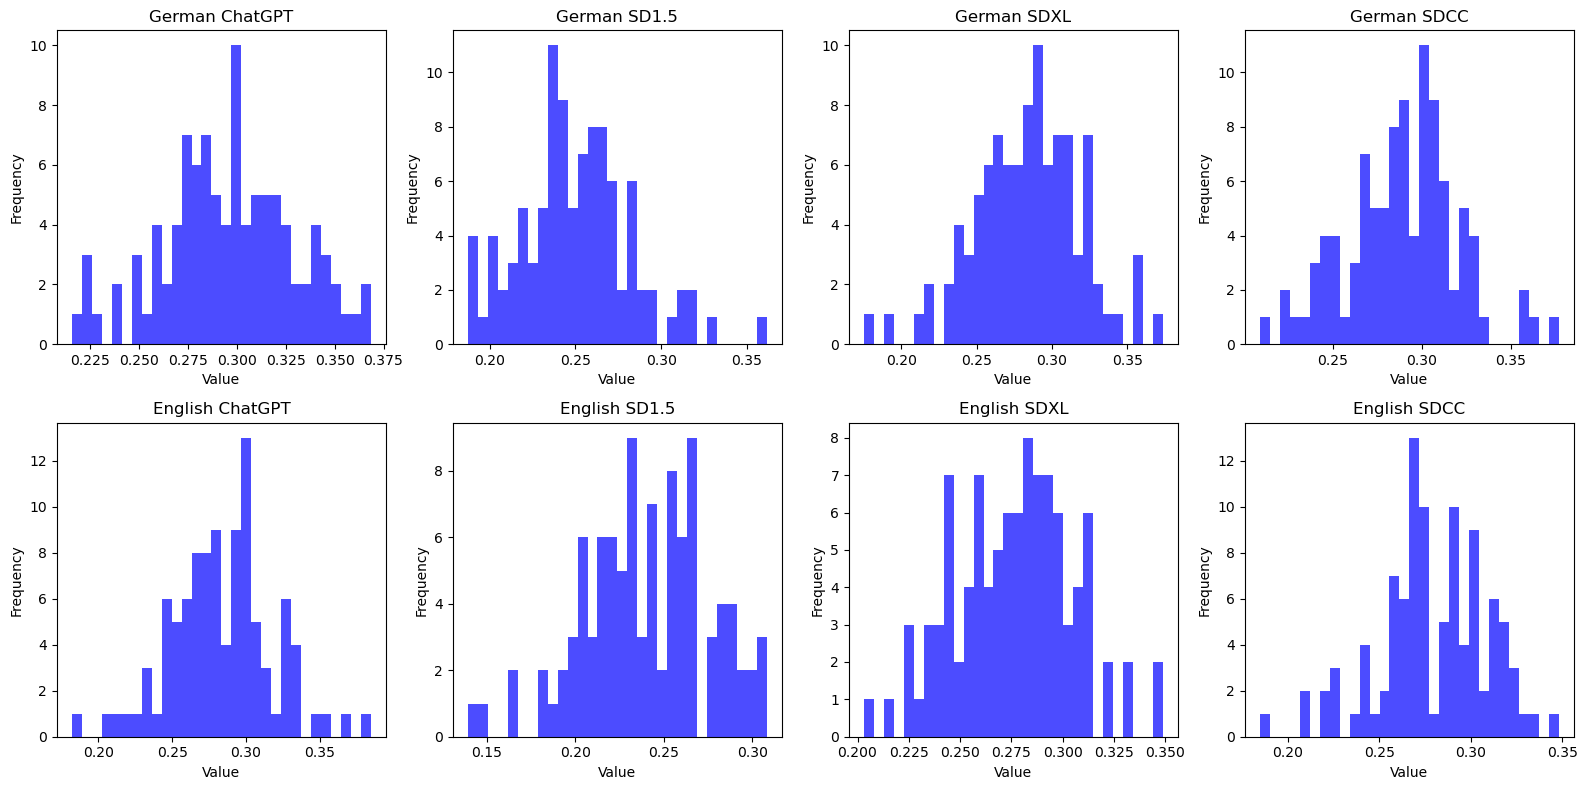

In [91]:
tensors = [
    text_image_g_gpt, text_image_g_15, text_image_g_xl, text_image_g_cc,
    text_image_e_gpt, text_image_e_15, text_image_e_xl, text_image_e_cc
]

# Titles for the histograms
tensors = [
    text_image_g_gpt, text_image_g_15, text_image_g_xl, text_image_g_cc,
    text_image_e_gpt, text_image_e_15, text_image_e_xl, text_image_e_cc
]

# Titles for the histograms
titles = [
    'German ChatGPT', 'German SD1.5', 'German SDXL', 'German SDCC',
    'English ChatGPT', 'English SD1.5', 'English SDXL', 'English SDCC'
]

# Plot histograms
plt.figure(figsize=(16, 8))

for i, tensor in enumerate(tensors):
    plt.subplot(2, 4, i + 1)  # 2 rows, 4 columns
    plt.hist(tensor.detach().numpy(), bins=30, alpha=0.7, color='blue')
    plt.title(titles[i])
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [92]:
import torch
import torch.nn.functional as F

# Compute pairwise cosine similarity
def compute_cosine_similarity(embeddings_list):
    n = len(embeddings_list)
    similarity_matrix = torch.zeros((n, n))
    
    for i in range(n):
        for j in range(i, n):
            if i == j:
                similarity = 1.0  # Cosine similarity with itself is always 1
            else:
                similarity = F.cosine_similarity(embeddings_list[i], embeddings_list[j]).mean().item()
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity
    
    return similarity_matrix

embeddings_list = [
    embedding_german_images_gpt,
    embedding_german_images_15,
    embedding_german_images_xl,
    embedding_german_images_cc,
    embedding_english_images_gpt,
    embedding_english_images_15,
    embedding_english_images_xl,
    embedding_english_images_cc
]

# Compute pairwise cosine similarities
similarity_matrix = compute_cosine_similarity(embeddings_list)



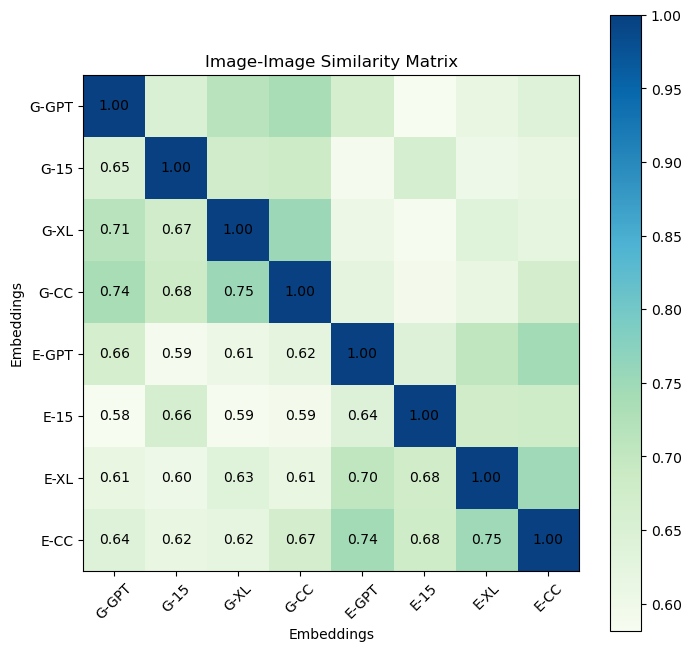

In [78]:
import matplotlib.pyplot as plt

# Plot the similarity matrix as heatmap
plt.figure(figsize=(8, 8))
plt.imshow(similarity_matrix, cmap='GnBu', interpolation='nearest')
plt.colorbar()
plt.title('Image-Image Similarity Matrix')
plt.xlabel('Embeddings')
plt.ylabel('Embeddings')
plt.xticks(range(8), ['G-GPT', 'G-15', 'G-XL', 'G-CC', 'E-GPT', 'E-15', 'E-XL', 'E-CC'], rotation=45)
plt.yticks(range(8), ['G-GPT', 'G-15', 'G-XL', 'G-CC', 'E-GPT', 'E-15', 'E-XL', 'E-CC'])
for i in range(masked_matrix.shape[0]):
    for j in range(masked_matrix.shape[1]):
        if i >= j:  # Only annotate the lower triangle
            plt.text(j, i, f"{similarity_matrix[i, j]:.2f}", ha='center', va='center', color='black')
plt.show()